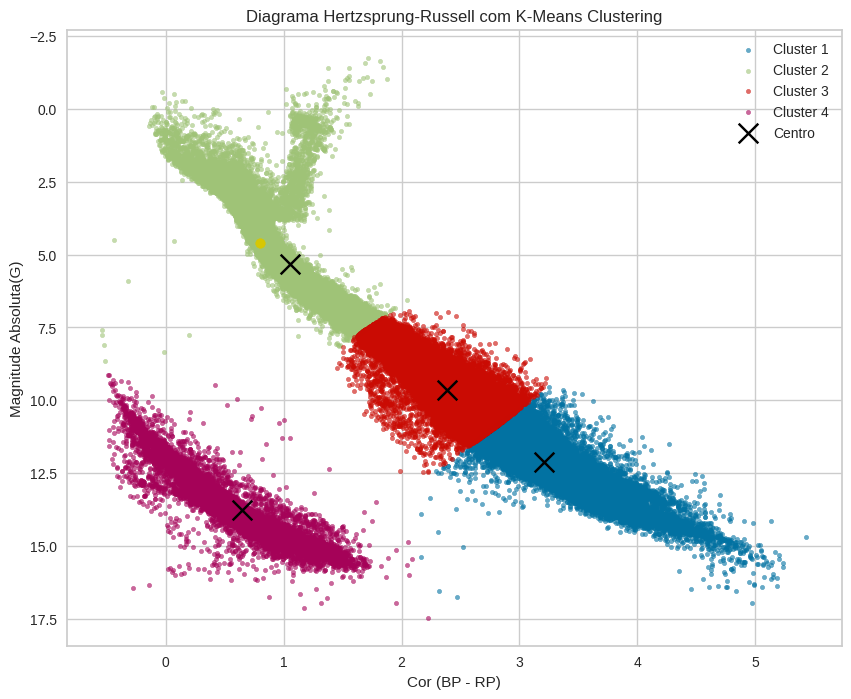

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

data = pd.read_csv("stars.csv")

# Extraíndo os dados relevantes
color_index = data['bp_rp'].values  # Cor (x-eixo)
absolute_magnitude = data['g_abs'].values  # Magnitude absoluta (y-eixo)
data = np.column_stack((color_index, absolute_magnitude))

# Padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-mean
num_clusters = 4  # Ajustável
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
labels = kmeans.fit_predict(data_scaled)

# Gráfico do diagrama HR - k-means clustering 
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    plt.scatter(
        color_index[labels == cluster],
        absolute_magnitude[labels == cluster],
        label=f'Cluster {cluster + 1}',
        s=10,
        alpha=0.6
    )
plt.scatter(0.8, 4.6)

# Centros
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='x', label='Centro')

# Melhoramentos no gráfico
plt.gca().invert_yaxis()  # inverte o eixo y
plt.xlabel('Cor (BP - RP)')
plt.ylabel('Magnitude Absoluta(G)')
plt.title('Diagrama Hertzsprung-Russell com K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=29, random_state=42),
                 k=(3, 30), timings=False)

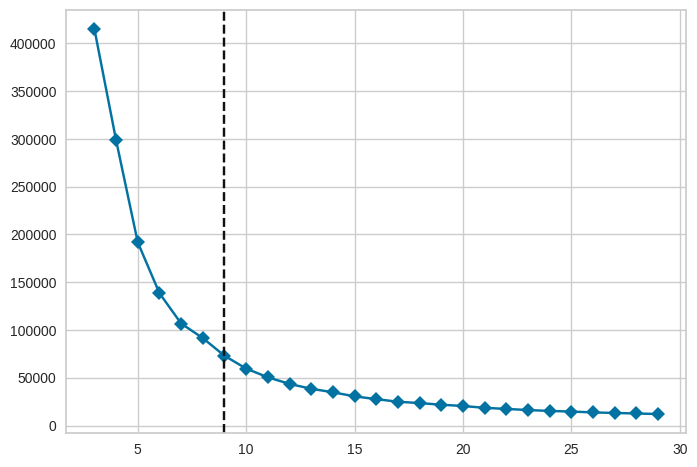

In [7]:
# Métod do cotovelo

random_state = 42
visualizer = KElbowVisualizer(
    KMeans(random_state=42), k=(3, 30), timings=False
)

visualizer.fit(data)

In [10]:
n_clusters = visualizer.elbow_value_
print("Melhor número de clusters de acordo com o método:", n_clusters)
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)

Melhor número de clusters de acordo com o método: 9
